In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Генерация выборки

Гистограмма выборки и теоретическая оценка плотности вероятности распределения Максвелла
(оно задает распределение частиц в идеальном газе, интересная штука)

Данное распределение мало схоже с нормальным, так как его матожидание не лежит в 0, что логично, так как нормальным распределением нельзя (маловероятно) описать частиц в идеальном газе.

Распределение Максвелла с вероятностью = 0.7 и mu = 0. Матожидание 1.117 Дисперсия 0.222


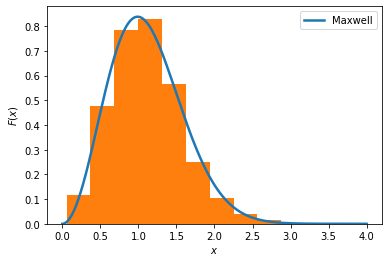

In [4]:
# вводим распределение Максвелла
mu,p=0,0.7
maxw = sts.maxwell(mu,p) 
rvs = maxw.rvs(1000)

# Частицы не могут быть распределены отрицательно, поэтому распределение существует x>=0. 
# Проведем генерацию 1к значений в пределах от 0 до 4
x = np.linspace(0,4,1000)

# Получим значение функции распределения Максвелла:
cdf_maxw = maxw.cdf(x)

# значение функции плотности вероятности Лапласа:
pdf_maxw = maxw.pdf(x)

# рисуем гистограмму распределения и функцию плотности:
plt.plot(x, pdf_maxw, label='Maxwell',linewidth = 2.5)
plt.hist(rvs, density = True)

# Найдем выборочные статистики среднее и дисперсию:
mean = maxw.mean()
var = maxw.var()

plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper right')

print(f'Распределение Максвелла с вероятностью = {p} и mu = {mu}. \
Матожидание {round(mean, 3)} Дисперсия {round(var, 3)}')

# Апроксимация по выборочным средним

In [11]:
def appr(n): # Создадим функцию, которая будет аппроксимировать выборочные средние через изменение объема выборки
# Вычисляем выборочные средние и отрисовываем их гистограмму
    means = []    # список выборочных средних
    for i in range(1000):
        rvs = maxw.rvs(n)
        means += [sum(rvs) / len(rvs)]
    plt.hist(means, bins=20, density=True)
    
    # Дублируем значение наших статистик
    mu = mean
    # Расписываем теоретическую сигму через дисперсию
    sigma = np.sqrt(var / n)
    # Получаем значения функции нормального распределения с нашими mu и sigma
    cpt = sts.norm(mu, sigma).pdf
        
    # Создаем ось длиной от 0.25 до 2
    x = np.linspace(0.25,2,10000)
    
    plt.plot(x, cpt(x), linewidth = 0.1,color = 'r')
    plt.xlabel('Выборочное среднее')
    plt.ylabel('Плотность распределения средних по выборкам')
    plt.title('n = %d' % n)
    plt.show()
    return

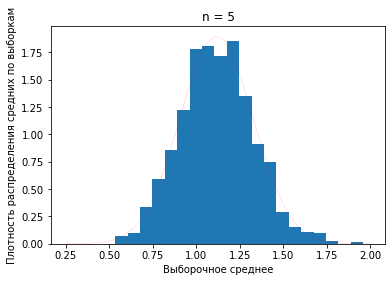

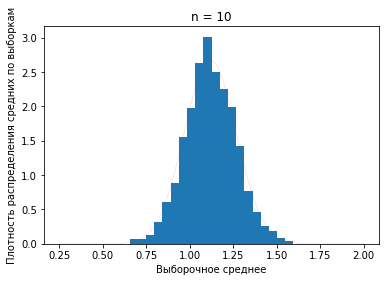

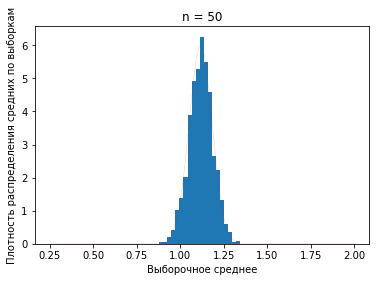

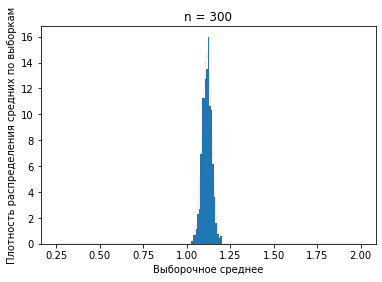

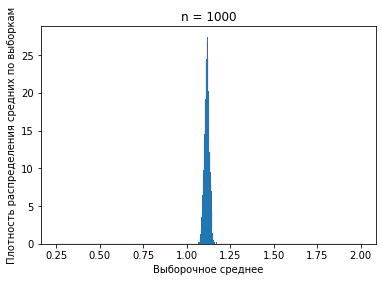

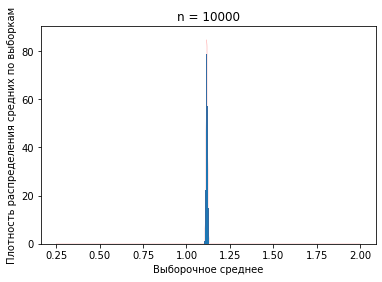

In [12]:
for n in [5, 10, 50, 300, 1000, 10000]:
    appr(n)

### Вывод

Распределение Максвелла свелось к нормальному, это заметно сходимости функции на точке матожидания при увеличении n. Это начинается заметно при n = 50. При n = 1000 ЦПТ очень заметна в действии, это очевидно, так как увеличение n сокращает разброс.